In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("netflix_titles.csv")

In [3]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

### Data Dictionary
* show_id: The Unique id for Movie/ TV Show
* type: Identifies if the media is a TV Show or a Movie
* title: Title of the Movie/ TV Show
* director: Specifies the dirctor of the Movie/ TV Show
* cast: Cast involved in the Movie/ TV Show
* country: country where the Movie/ TV Show was produced
* date_added: Date it was added on Netflix
* release_year: Actual release year of the Movie/ TV Show
* rating: Rating of the Movie/ TV Show
* duration: Total Duration - in minutes (for movies) or number of seasons (for TV Shows)
* listed_in: Genre
* description: Description of Movie/ TV Show

**Total rows and columns**

We can see that there are 8807 rows and 12 columns in our training dataset.

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Missing Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
data.isnull().sum().sum()

4307

There are a total of 4,307 null values across the entire dataset with 2,634 missing points under “director”, 825 under “cast”, 831 under “country”, 10 under “date_added”, 4 under “rating” and 3 under "duration"

We handle the Null values either by Imputing a value or by deleting the rows that contain missing data. Deleting the rows might also result in losing data. So, for the columns "director", "cast" and "country" we fill in the data instead of deleting it because of the huge number of missimg values. Alternately, for the other columns i.e. "date_added", "rating" and "duration" we delete the rows as the number of missing values is negligible.

In [9]:
data.director.fillna("No Director", inplace=True)
data.cast.fillna("No Cast", inplace=True)
data.country.fillna("Country Unavailable", inplace=True)

In [10]:
data.dropna(subset=["date_added", "rating","duration"], inplace=True)

In [11]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


we are only noticing the release_year column in describe() because it is the only column that has int datatype rest all columns have object datatype

# Data Visualization using Matplotlib and Seaborn packages.

In [13]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

# Bar Charts for categorical Variables

* type
* country
* date_added
* rating
* duration
* listed_in

In [14]:
print(data.release_year.min())
print(data.release_year.max())

1925
2021


Text(0.5, 1.0, 'Total Number of movies and TV shows released over the years 1925-2021')

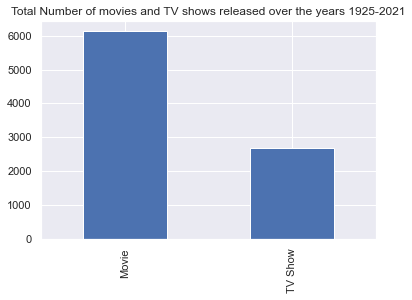

In [15]:
data.type.value_counts().plot(kind='bar')
plt.title("Total Number of movies and TV shows released over the years 1925-2021")

In [16]:
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [17]:
value_counts = data['type'].value_counts()

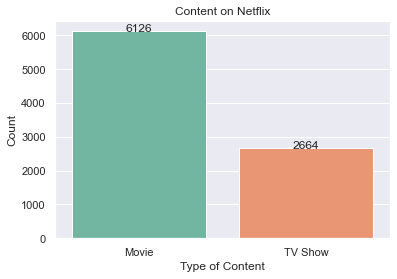

In [18]:
sns.countplot(x='type',data = data, palette = "Set2")
plt.title("Content on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha="center")

In [19]:
rating_vc = data['rating'].value_counts()

In [20]:
rating_order = ['TV-MA','TV-14','TV-PG','R','PG-13','TV-Y7','TV-Y','PG','TV-G','NR','G','TV-Y7-FV','NC-17','UR']

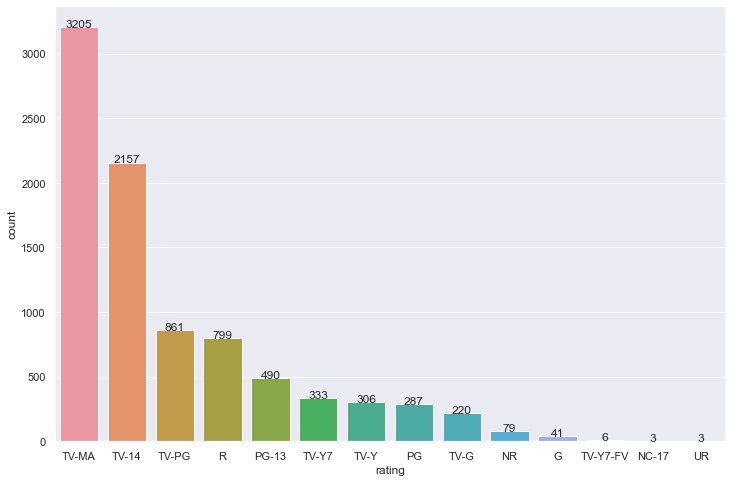

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = data, order = rating_order)
for i, v in enumerate(rating_vc):
    plt.text(i, v, str(v), ha="center")

<AxesSubplot:xlabel='rating', ylabel='count'>

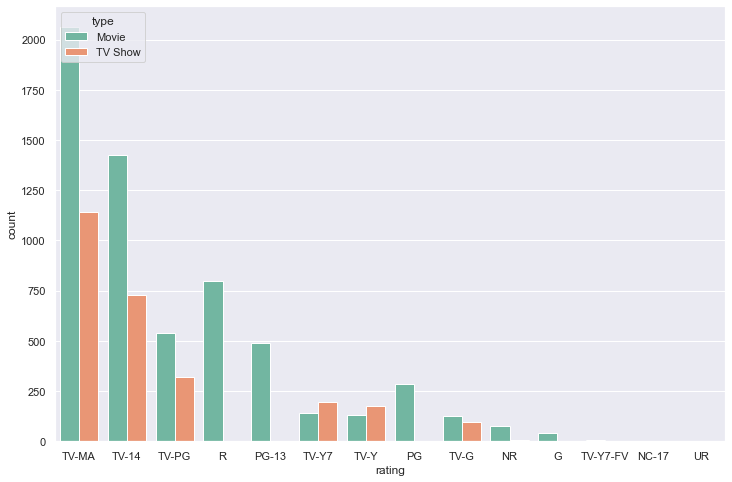

In [22]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = data,hue='type', order = rating_order, palette = "Set2")

In [45]:
data['date_added'][0]

'September 25, 2021'

In [82]:
from datetime import datetime

In [83]:
data['date_added_date_format'] = data['date_added'].apply(lambda x:datetime.strptime(x.strip(),'%B %d, %Y'))

In [84]:
data['date_added_date_format']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added_date_format, Length: 8790, dtype: datetime64[ns]

In [87]:
data['year_added'] = data['date_added_date_format'].apply(lambda x:x.year)

In [88]:
data['year_added'] 

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8790, dtype: int64

In [89]:
grouped_data = data.groupby(['year_added', 'type']).size().reset_index(name='count')

In [90]:
grouped_data

,year_added,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [91]:
movies_data = grouped_data[grouped_data['type'] == 'Movie']
tv_shows_data = grouped_data[grouped_data['type'] == 'TV Show']

In [92]:
movies_data

,year_added,type,count
0,2008,Movie,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
8,2014,Movie,19
10,2015,Movie,56
12,2016,Movie,251
14,2017,Movie,836


In [93]:
tv_shows_data

,year_added,type,count
1,2008,TV Show,1
7,2013,TV Show,5
9,2014,TV Show,5
11,2015,TV Show,26
13,2016,TV Show,175
15,2017,TV Show,349
17,2018,TV Show,411
19,2019,TV Show,592
21,2020,TV Show,595
23,2021,TV Show,505


In [94]:
total_counts = grouped_data.groupby('year_added')['count'].sum().reset_index(name='count')

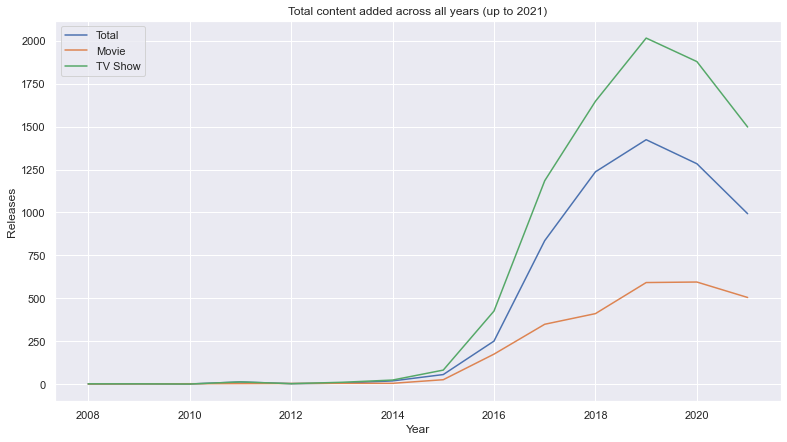

In [95]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data = movies_data, x = 'year_added', y = 'count')
sns.lineplot(data = tv_shows_data, x = 'year_added', y = 'count')
sns.lineplot(data = total_counts, x = 'year_added', y = 'count')
# ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

In [97]:
filtered_countries = data[data['country'] != 'Country Unavailable']

In [105]:
filtered_countries = filtered_countries['country'].apply(lambda x:x.split(',',))

In [106]:
filtered_countries

0                                         [United States]
1                                          [South Africa]
4                                                 [India]
7       [United States,  Ghana,  Burkina Faso,  United...
8                                        [United Kingdom]
                              ...                        
8801                      [United Arab Emirates,  Jordan]
8802                                      [United States]
8804                                      [United States]
8805                                      [United States]
8806                                              [India]
Name: country, Length: 7961, dtype: object

In [109]:
split_countries = filtered_countries.str.get_dummies(', ')

In [110]:
split_countries

,' Afghanistan'],' Albania',' Algeria'],' Angola'],' Argentina',' Argentina'],' Armenia',' Australia',' Australia'],' Austria',...,['United Kingdom'],['United States',['United States'],['Uruguay',['Uruguay'],['Venezuela',['Venezuela'],['Vietnam'],['West Germany'],['Zimbabwe']
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [98]:
filtered_countries.str.split(‘, ‘, expand=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,date_added_date,year_added_1,date_added_date_format
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,2021-09-25,2021,2021-09-25
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2021-09-24,2021,2021-09-24
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2021-09-24,2021,2021-09-24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,2021-09-24,2021,2021-09-24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,2021-09-24,2021,2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,2016-03-09,2016,2016-03-09
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,2019-11-20,2019,2019-11-20
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,2019-11-01,2019,2019-11-01
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,2020-01-11,2020,2020-01-11
